In [1]:
import scipy.sparse as sp
import numpy as np
import scipy.io as io

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
A_PATH = '../data/A.mtx'
B_PATH = '../data/b.txt'
SHAPE_X = 60 
SHAPE_Y = 220

In [4]:
A = pd.read_csv(A_PATH, sep=' ', names=['1', '2', '3'])
# b = pd.read_csv(B_PATH).to_numpy()

A = A.to_numpy()
row = A[:,0]
col = A[:,1]
value = A[:,2]

In [5]:
matrix = sp.coo_matrix((value, (row, col)), shape=(SHAPE_X*SHAPE_Y*2, SHAPE_X*SHAPE_Y*2)).toarray()

In [6]:
matrix.shape

(26400, 26400)

In [61]:
STEP = 50
p1 = matrix[:SHAPE_X*SHAPE_Y, :SHAPE_X*SHAPE_Y][::STEP, ::STEP]
p2 = matrix[SHAPE_X*SHAPE_Y:, :SHAPE_X*SHAPE_Y][::STEP, ::STEP]
p3 = matrix[:SHAPE_X*SHAPE_Y, SHAPE_X*SHAPE_Y:][::STEP, ::STEP]
p4 = matrix[SHAPE_X*SHAPE_Y:, SHAPE_X*SHAPE_Y:][::STEP, ::STEP]

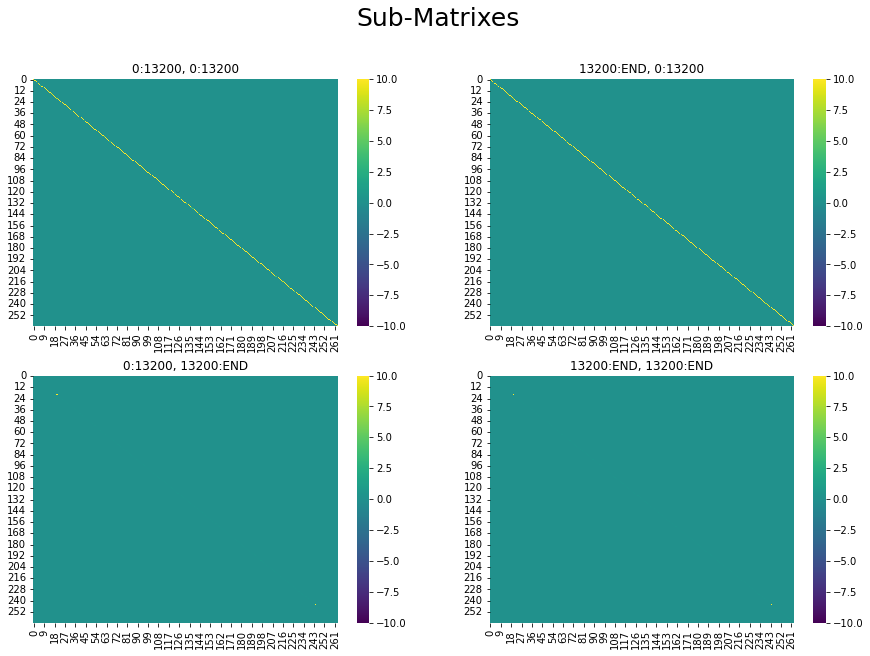

In [64]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
plt.suptitle("Sub-Matrixes", fontsize=25)
sns.heatmap(p1, vmin=-10, vmax=10, cmap='viridis',
           ax=ax[0][0]);
ax[0][0].set_title(f'0:{SHAPE_X*SHAPE_Y}, 0:{SHAPE_X*SHAPE_Y}')

sns.heatmap(p2, vmin=-10, vmax=10, cmap='viridis',
           ax=ax[0][1]);
ax[0][1].set_title(f'{SHAPE_X*SHAPE_Y}:END, 0:{SHAPE_X*SHAPE_Y}')

sns.heatmap(p3, vmin=-10, vmax=10, cmap='viridis',
           ax=ax[1][0]);
ax[1][0].set_title(f'0:{SHAPE_X*SHAPE_Y}, {SHAPE_X*SHAPE_Y}:END')

sns.heatmap(p4, vmin=-10, vmax=10, cmap='viridis',
           ax=ax[1][1]);
ax[1][1].set_title(f'{SHAPE_X*SHAPE_Y}:END, {SHAPE_X*SHAPE_Y}:END')

plt.show()

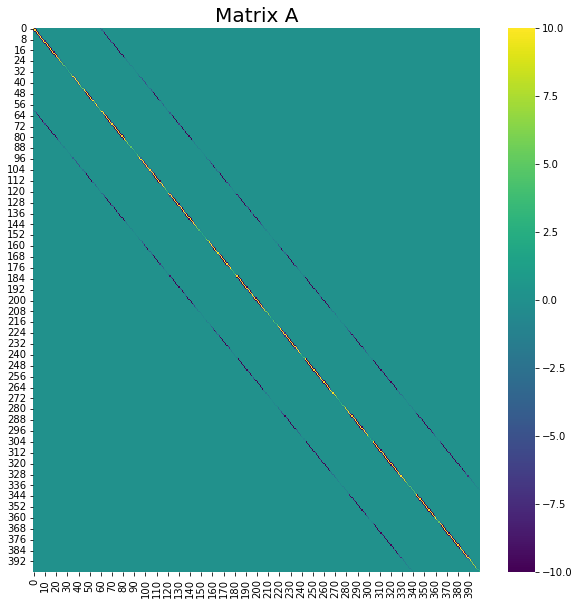

In [16]:
matrix_to_write = matrix[0:400, 0:400]
plt.figure(figsize=(10,10))
plt.title("Matrix A", fontsize=20)
sns.heatmap(matrix_to_write, vmin=-10, vmax=10, cmap='viridis')
plt.show()

In [65]:
# %%time
# solution = sp.linalg.spsolve(matrix, b);
# np.savetxt('solution.txt', solution[:, None])

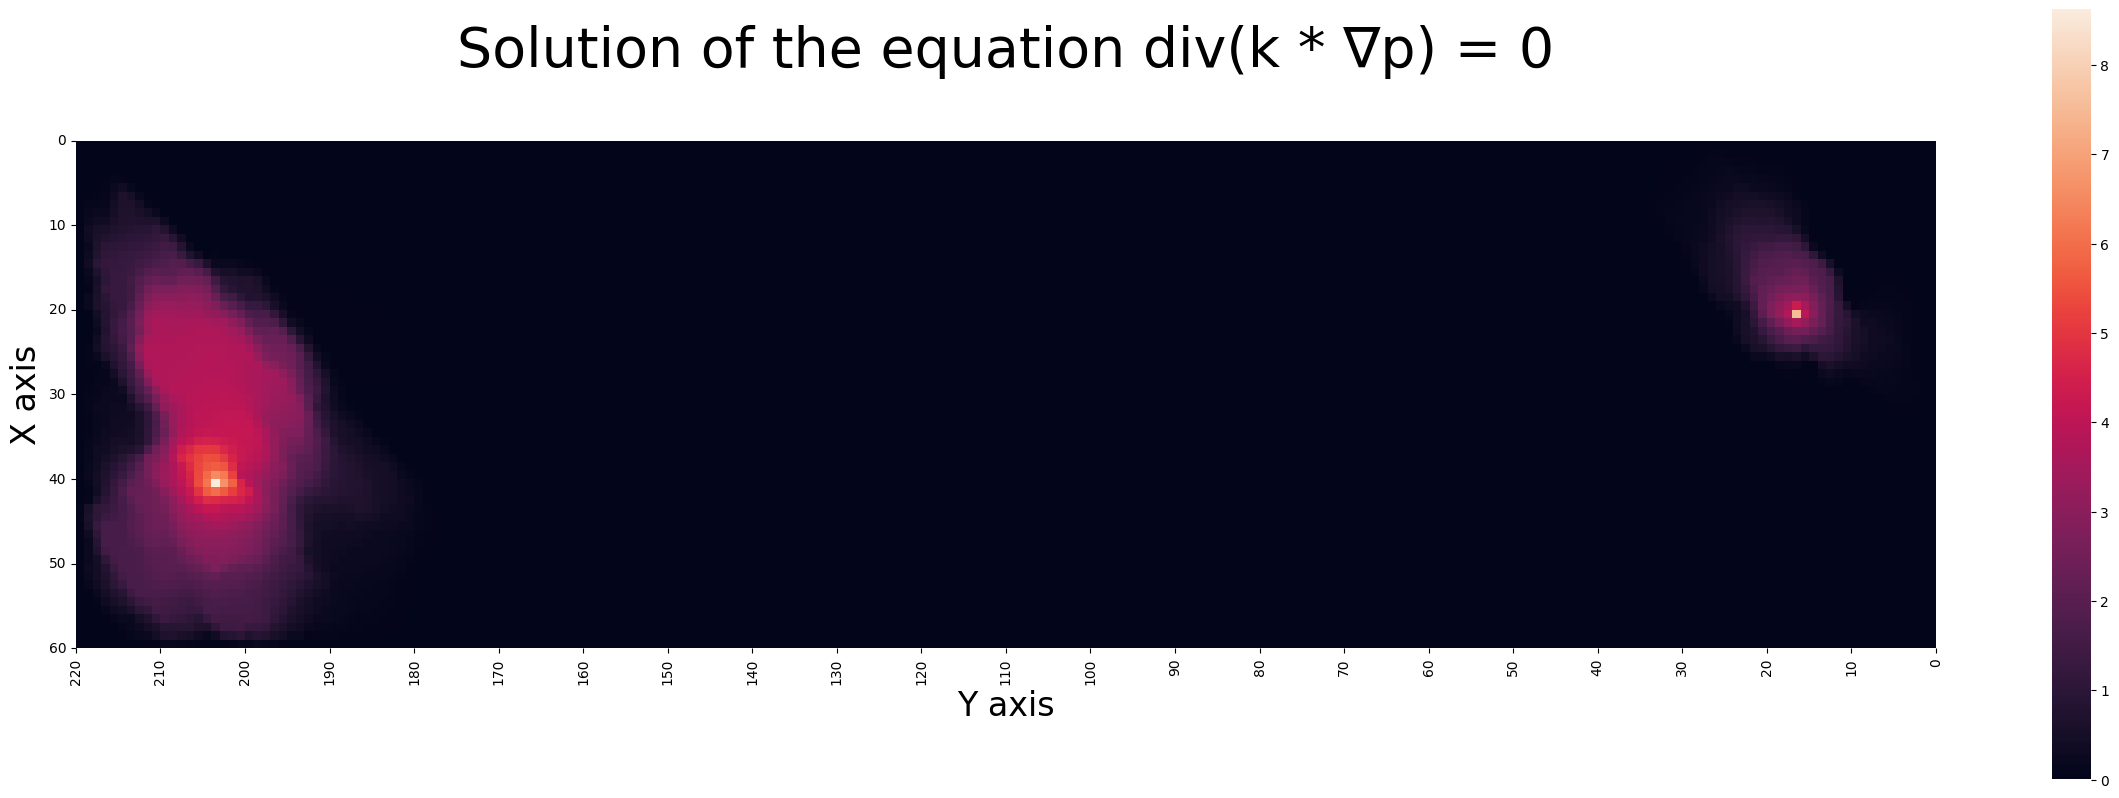

In [9]:
# sol = solution.reshape((220,60))
# plt.figure(figsize=(30,10))

# plt.title("Solution of the equation div(k * ∇p) = 0\n", fontsize=40)
# ax = sns.heatmap(data=sol.T,square=True)
# ax.set_aspect("equal")
# ax.set_ylabel('X axis', fontsize=24)
# ax.set_xlabel('Y axis', fontsize=24)
# ax.set_xticks(list(range(0, 221, 10)))
# ax.set_xticklabels(list(range(220, -1, -10)))
# ax.set_yticks(list(range(0, 61, 10)))
# ax.set_yticklabels(list(range(0, 61, 10)))

# plt.savefig("../data/Examplet.png")